In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models

In [2]:
kaggle_cred=json.load(open("/content/drive/MyDrive/Kaggle API/kaggle.json"))

In [3]:
os.environ['KAGGLE_USERNAME'] = kaggle_cred['username']
os.environ['KAGGLE_KEY'] = kaggle_cred['key']

**Data Loading and Preprocessing**

In [4]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:38<00:00, 24.2MB/s]
100% 2.04G/2.04G [01:38<00:00, 22.1MB/s]


In [5]:
with ZipFile("/content/plantvillage-dataset.zip",'r') as zip:
  zip.extractall()

In [ ]:
print(os.listdir("/content/plantvillage dataset"))
print("Color")
print(len(os.listdir("/content/plantvillage dataset/color")))
print(os.listdir("/content/plantvillage dataset/color"))
print("GrayScale")
print(len(os.listdir("/content/plantvillage dataset/grayscale")))
print(os.listdir("/content/plantvillage dataset/grayscale"))
print("Segmented")
print(len(os.listdir("/content/plantvillage dataset/segmented")))
print(os.listdir("/content/plantvillage dataset/segmented"))

['grayscale', 'color', 'segmented']
Color
38
['Soybean___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Pepper,_bell___healthy', 'Grape___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Common_rust_', 'Orange___Haunglongbing_(Citrus_greening)', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Strawberry___healthy', 'Apple___Apple_scab', 'Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Black_rot', 'Potato___Late_blight', 'Apple___Cedar_a

In [ ]:
print(len(os.listdir("/content/plantvillage dataset/color/Apple___Apple_scab")))
print(len(os.listdir("/content/plantvillage dataset/segmented/Blueberry___healthy")))
print(len(os.listdir("/content/plantvillage dataset/grayscale/Grape___Black_rot")))

630
1502
1180


(256, 256, 3)


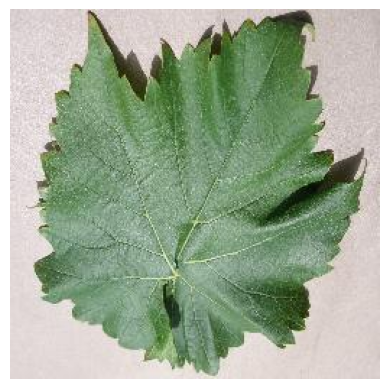

In [ ]:
img=mpimg.imread("/content/plantvillage dataset/color/Grape___healthy/0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG")
print(img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
img_size=224
batch_size=32

In [ ]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2           )

In [ ]:
train_generator=data_gen.flow_from_directory(
    "/content/plantvillage dataset/color",
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator=data_gen.flow_from_directory(
    "/content/plantvillage dataset/color",
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
    )

Found 10849 images belonging to 38 classes.


**Creating the Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(optimizer="adam",
               loss="categorical_crossentropy",
               metrics=["accuracy"]
               )

**Training the model**

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=6,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/6
1358/1358 [==============================] - 129s 89ms/step - loss: 0.9649 - accuracy: 0.7327 - val_loss: 0.4493 - val_accuracy: 0.8613
Epoch 2/6
1358/1358 [==============================] - 139s 102ms/step - loss: 0.2537 - accuracy: 0.9201 - val_loss: 0.3968 - val_accuracy: 0.8827
Epoch 3/6
1358/1358 [==============================] - 120s 88ms/step - loss: 0.1062 - accuracy: 0.9666 - val_loss: 0.4192 - val_accuracy: 0.8822
Epoch 4/6
1358/1358 [==============================] - 113s 83ms/step - loss: 0.0735 - accuracy: 0.9761 - val_loss: 0.5282 - val_accuracy: 0.8660
Epoch 5/6
1358/1358 [==============================] - 110s 81ms/step - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.5932 - val_accuracy: 0.8664
Epoch 6/6
1358/1358 [==============================] - 114s 84ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.6883 - val_accuracy: 0.8576


In [ ]:
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print("Validation Accuracy : ",val_accuracy*100)

339/339 [==============================] - 20s 57ms/step - loss: 0.6883 - accuracy: 0.8576
Validation Accuracy :  85.75774431228638


**Model Loss and Accuracy**

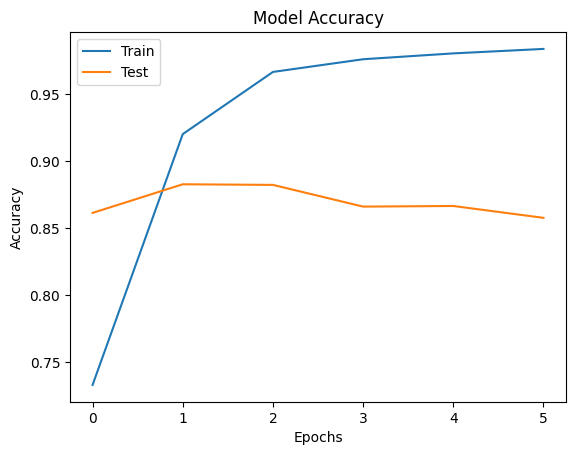

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"])
plt.show()

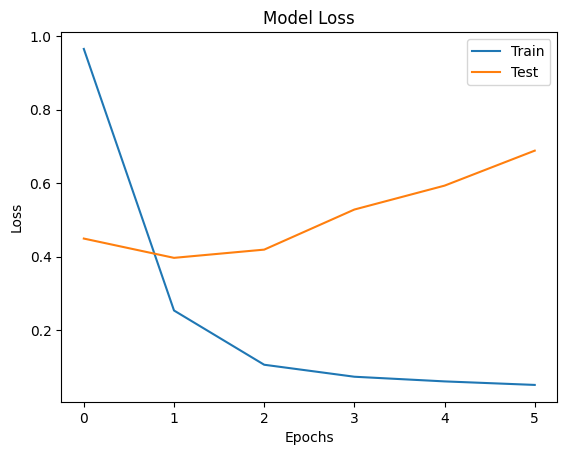

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Test"])
plt.show()

In [ ]:
def load_and_preprocess(img_path,target_size=(224,224)):
  img=Image.open(img_path)
  img=img.resize(target_size)
  img=np.array(img)
  img=np.expand_dims(img,axis=0)
  img=img/255.0
  return img

In [ ]:
def predict_disease_class(model,img_path,class_idx):
  processed_img=load_and_preprocess(img_path)
  predictions=model.predict(processed_img)
  predicted_class_idx=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_idx[predicted_class_idx]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class_name,confidence

In [ ]:
class_idx={v:k for k,v in train_generator.class_indices.items()}

In [ ]:
json.dump(class_idx,open("class_index.json","w"))

In [ ]:
img_path="/content/apple_black_rot.JPG"
img_path2="/content/tomato_bacterial_spot.JPG"
disease_name,confi1=predict_disease_class(model,img_path,class_idx)
disease_name2,confi2=predict_disease_class(model,img_path2,class_idx)
print(disease_name,"confidence - ",confi1)
print(disease_name2,"confidence - ",confi2)

1/1 [==============================] - 0s 19ms/step
Apple___Black_rot confidence -  99.79
Tomato___Bacterial_spot confidence -  100.0


In [ ]:
model.save("plant_disease_prediction_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
